In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline


In [114]:
df = pd.read_csv('/kaggle/input/predictive/predictive_maintenance.csv')
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

## EDA

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [85]:
#check for null values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [86]:
print(df['Failure Type'].unique(),df['Type'].unique(),df['Product ID'].unique())

['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure'] ['M' 'L' 'H'] ['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']


In [87]:
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

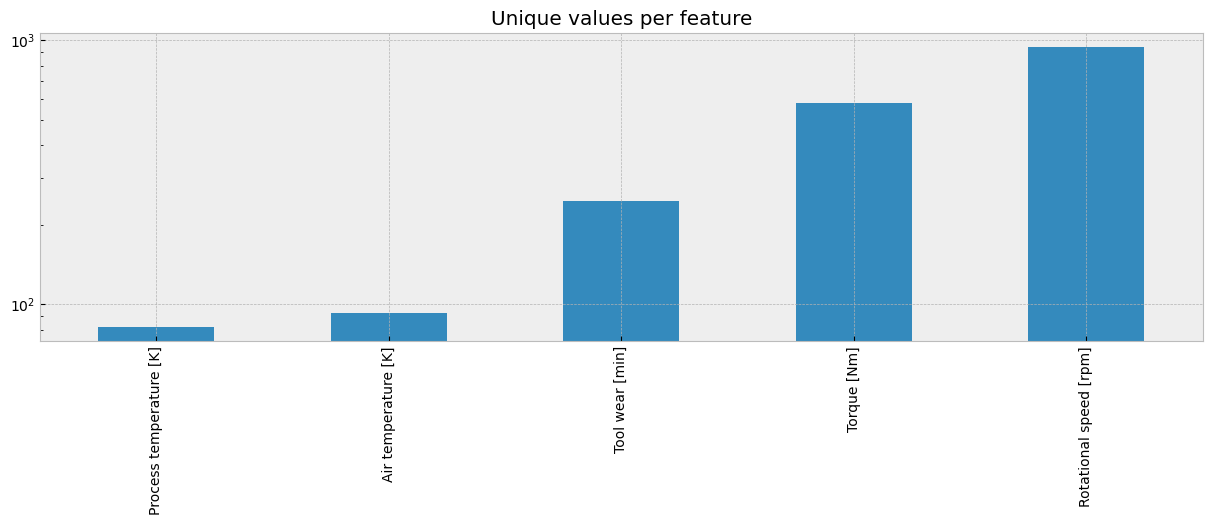

In [88]:
# For each numerical feature compute number of unique entries

unique_values = df.drop(['Target','UDI'], axis=1).select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

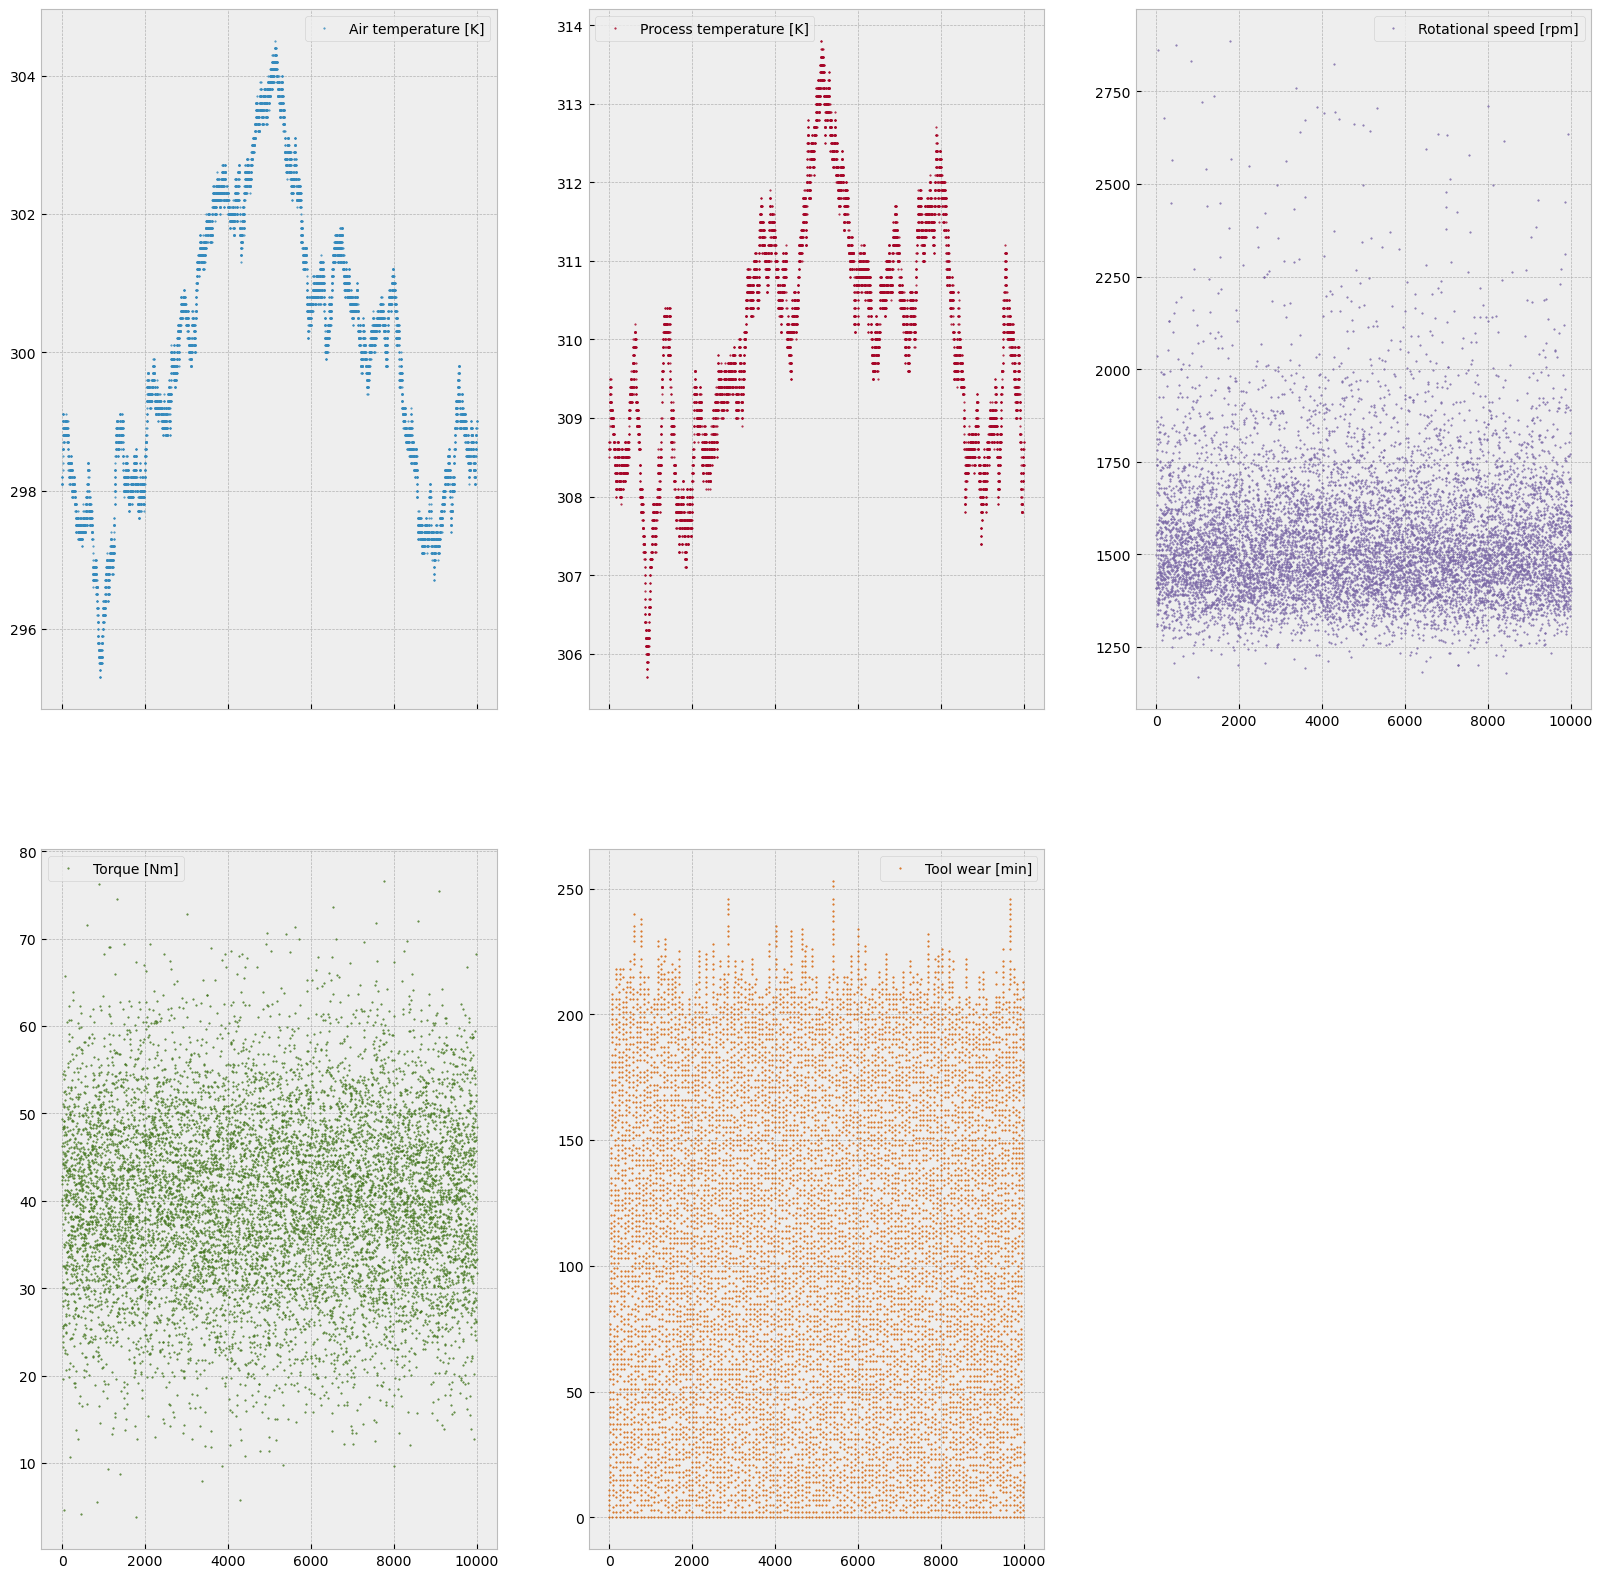

In [89]:
df.drop(['Target','UDI'],axis=1).plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(20, 20), markersize=1);

In [90]:
df.describe(exclude=["number"])

Product ID   Type Failure Type
count       10000  10000        10000
unique      10000      3            6
top        M14860      L   No Failure
freq            1   6000         9652

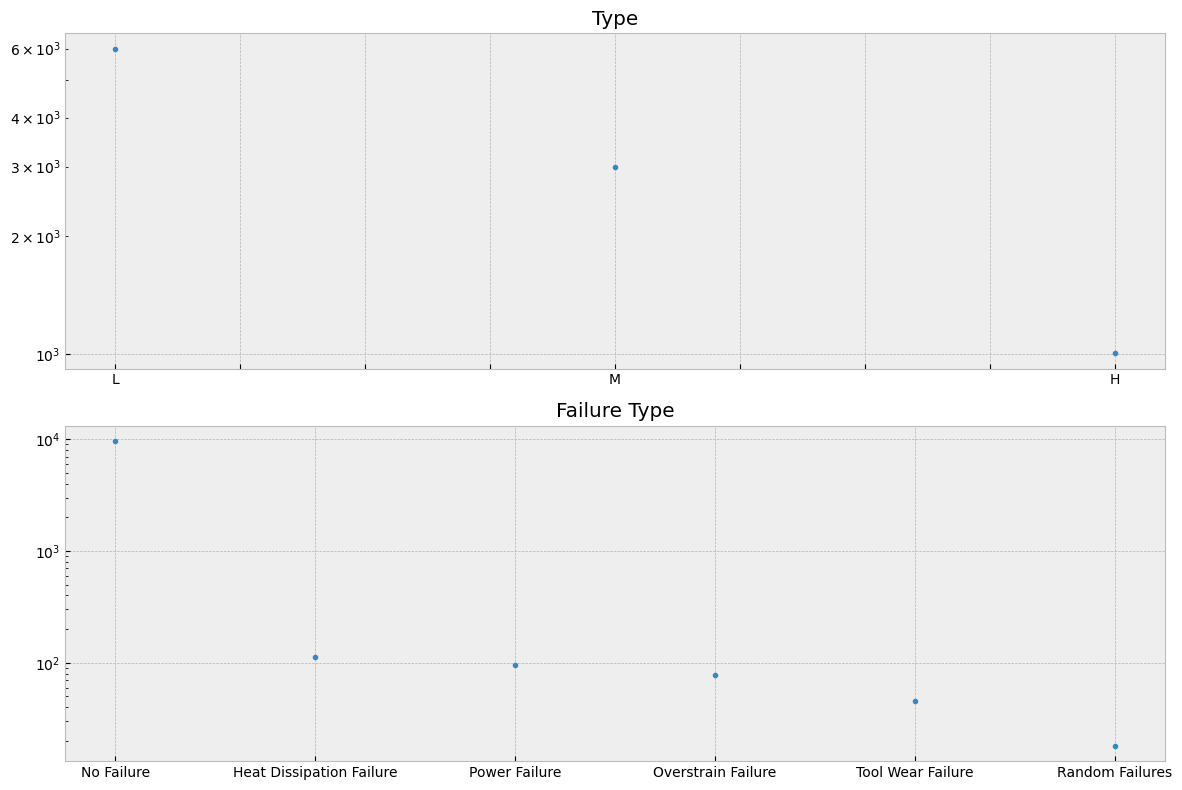

In [91]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df.drop(['UDI','Product ID'],axis=1).select_dtypes(exclude=["number"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

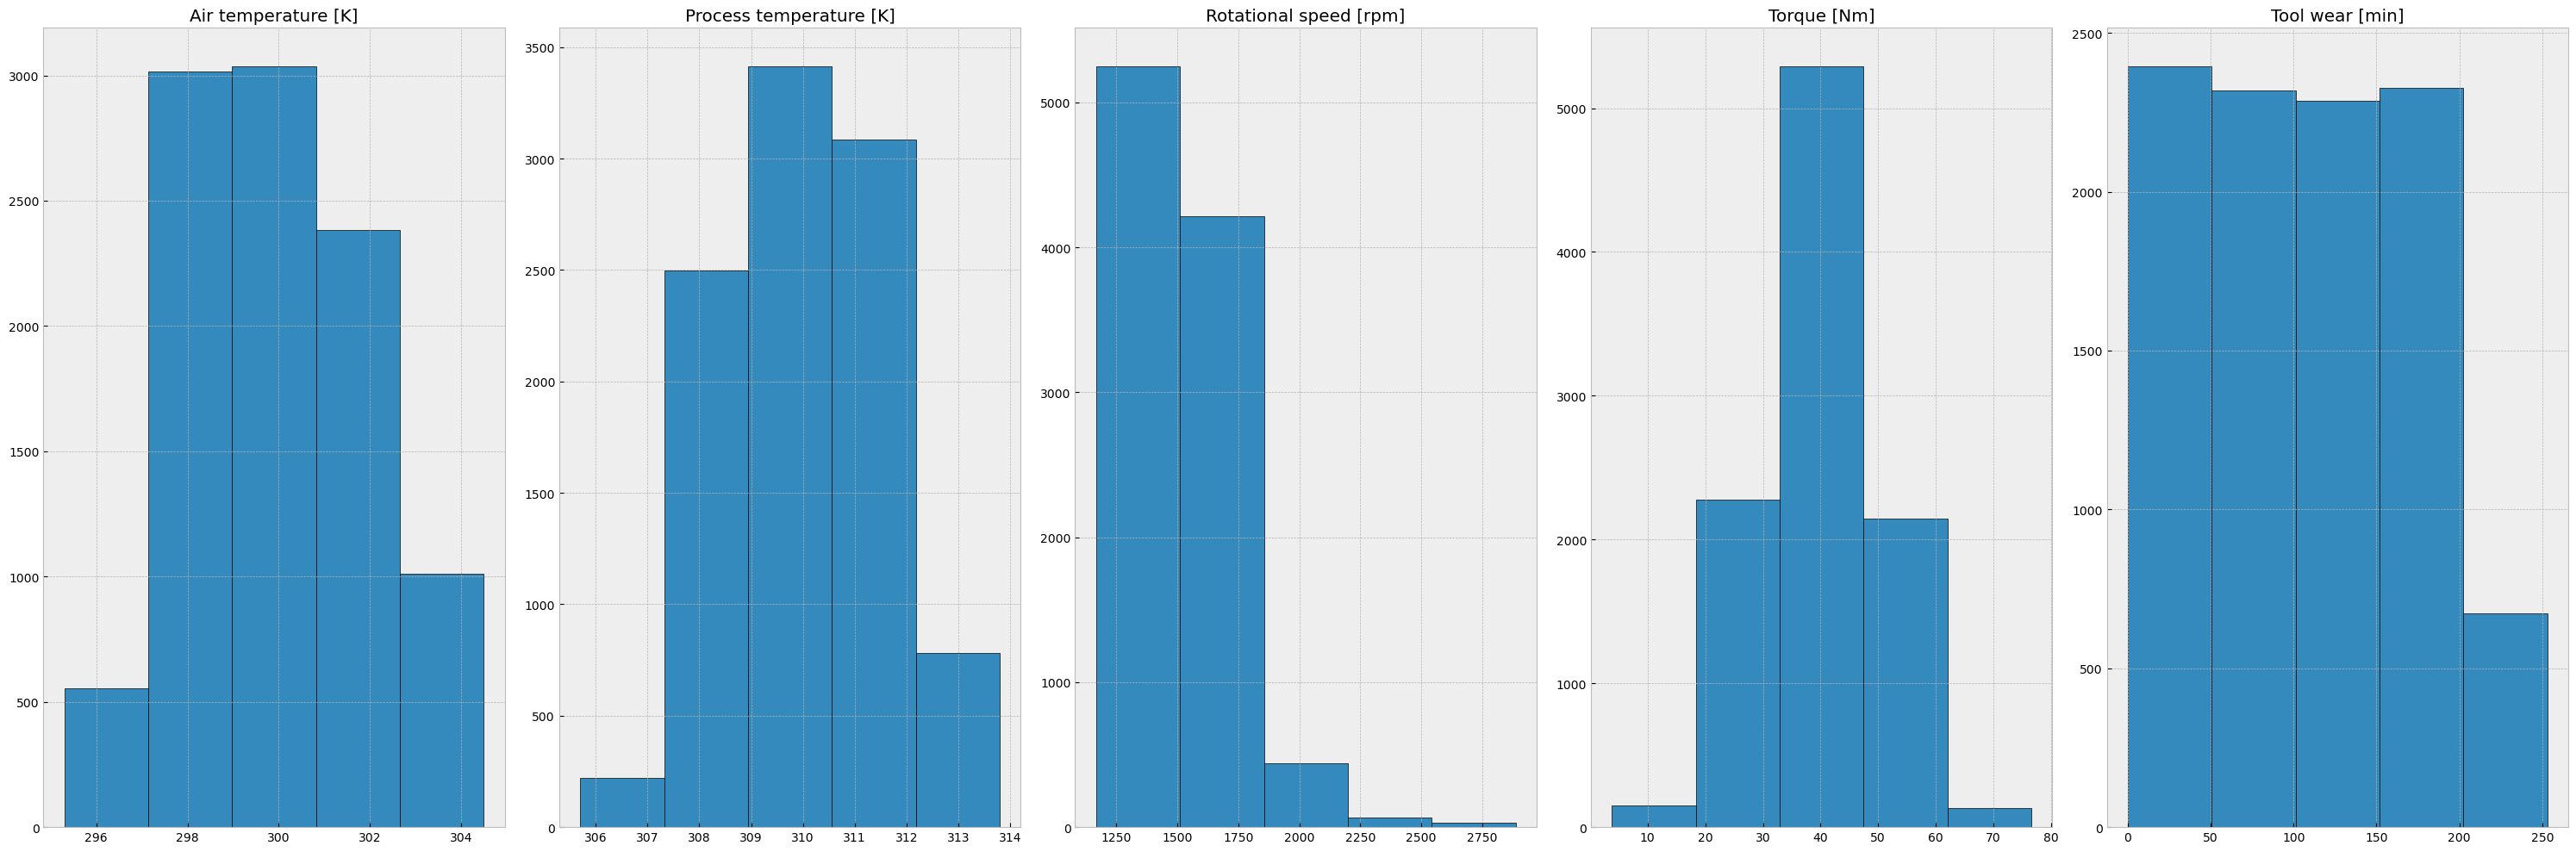

In [92]:
df1=df.drop(['UDI','Product ID','Target','Failure Type'],axis=1)
df1.hist(bins=5, figsize=(30, 10), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

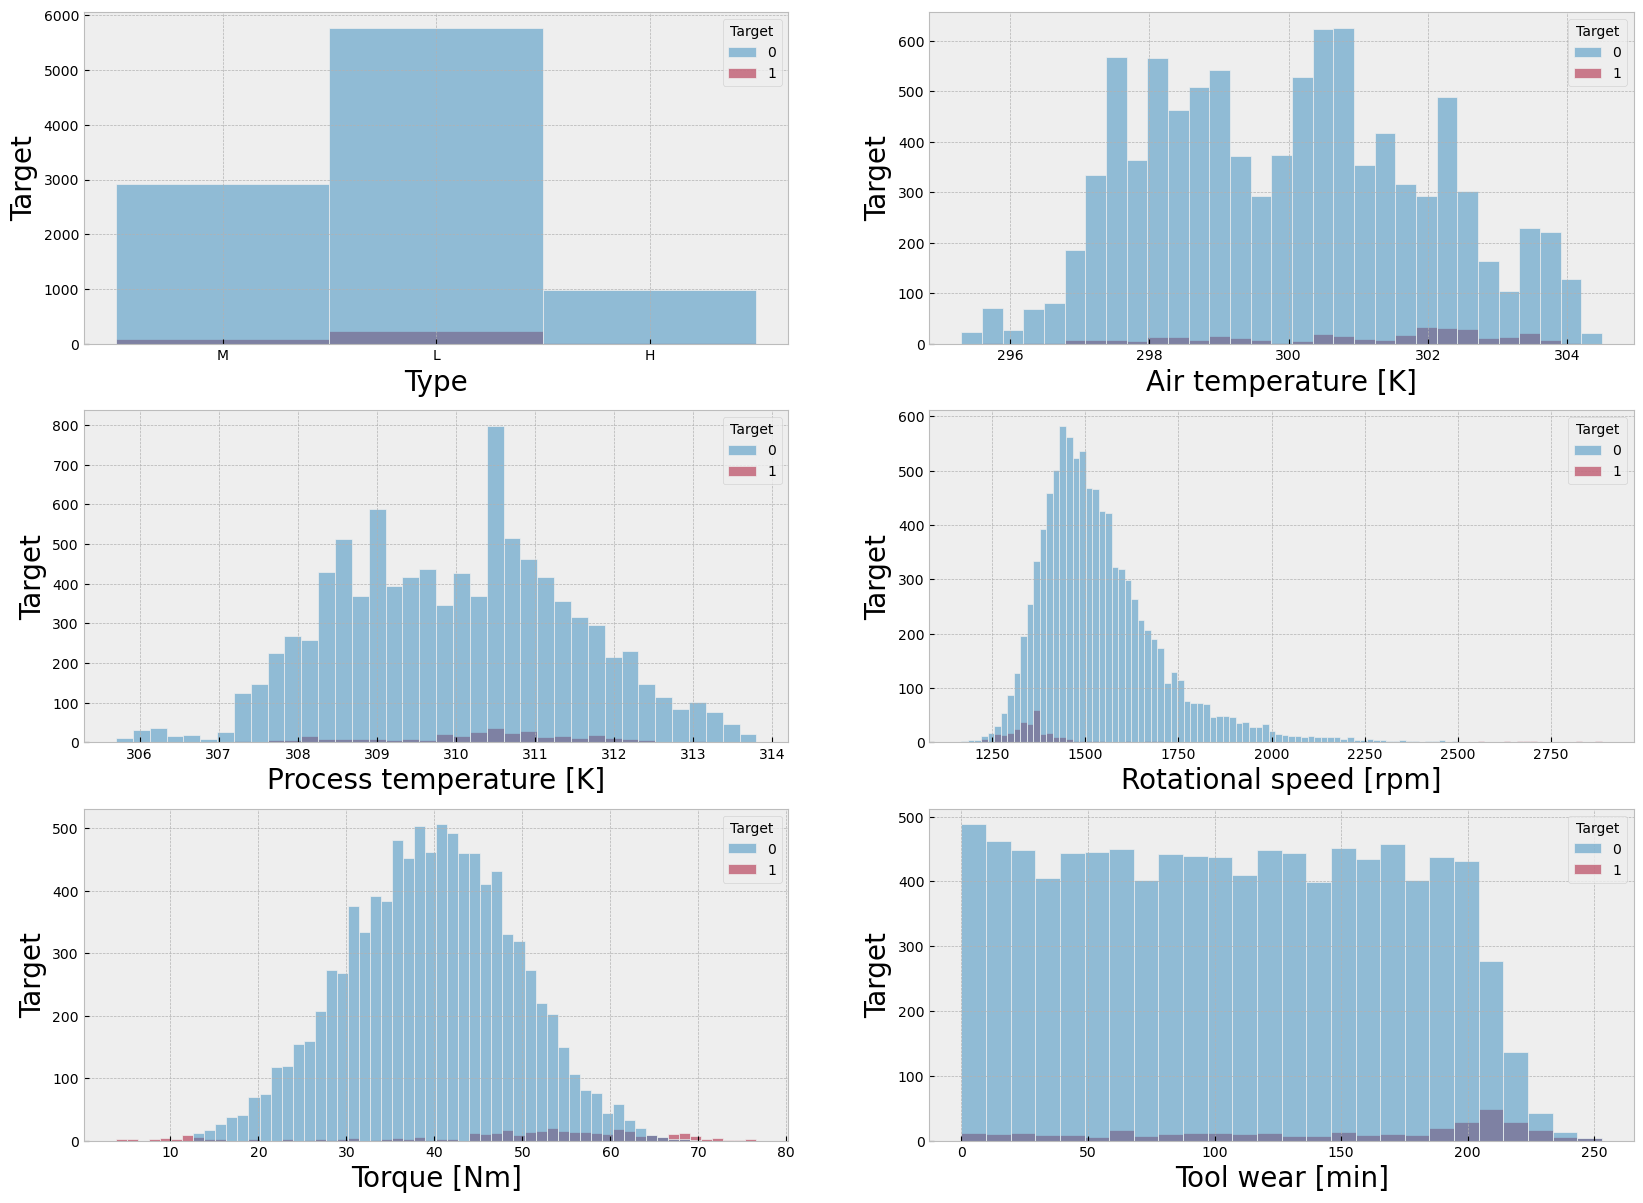

In [93]:
df_X=df.drop(['Target','Failure Type','UDI','Product ID'],axis=1)
#Bivariant analysis
plt.figure(figsize=(20,25))
plotnumber = 1
for column in df_X.columns:
    if plotnumber<=6 :   
        ax = plt.subplot(5,2,plotnumber) 
        sns.histplot(x=df_X[column],hue=df.Target)
        plt.xlabel(column,fontsize=20) 
        plt.ylabel('Target',fontsize=20)
    plotnumber+=1 
plt.show()

Type                       0.6000
Process temperature [K]    0.0317
Air temperature [K]        0.0279
Tool wear [min]            0.0120
Torque [Nm]                0.0052
dtype: float64

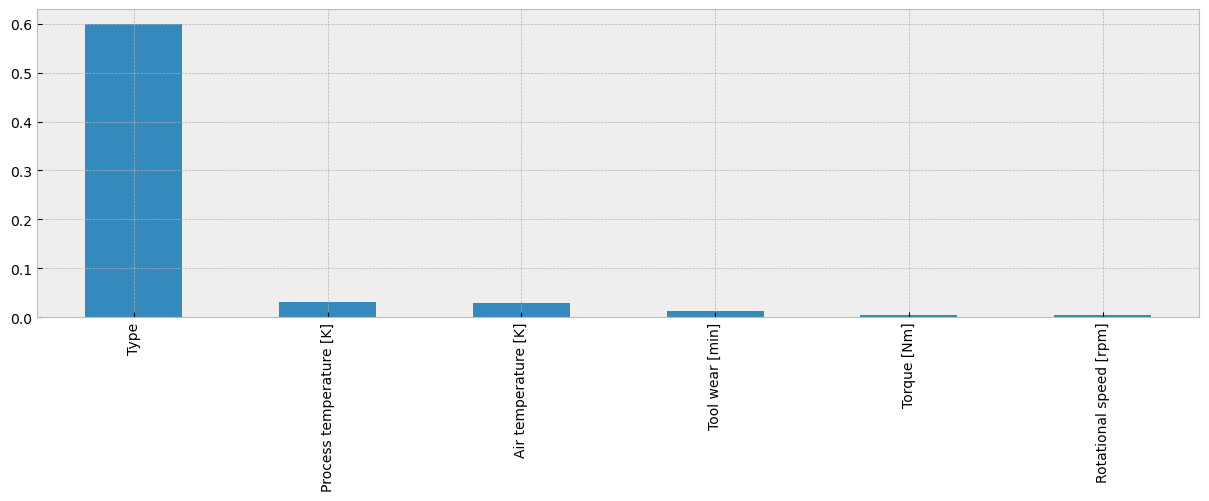

In [94]:
# Collects for each feature the most frequent entry
most_frequent_entry = df1.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df1.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


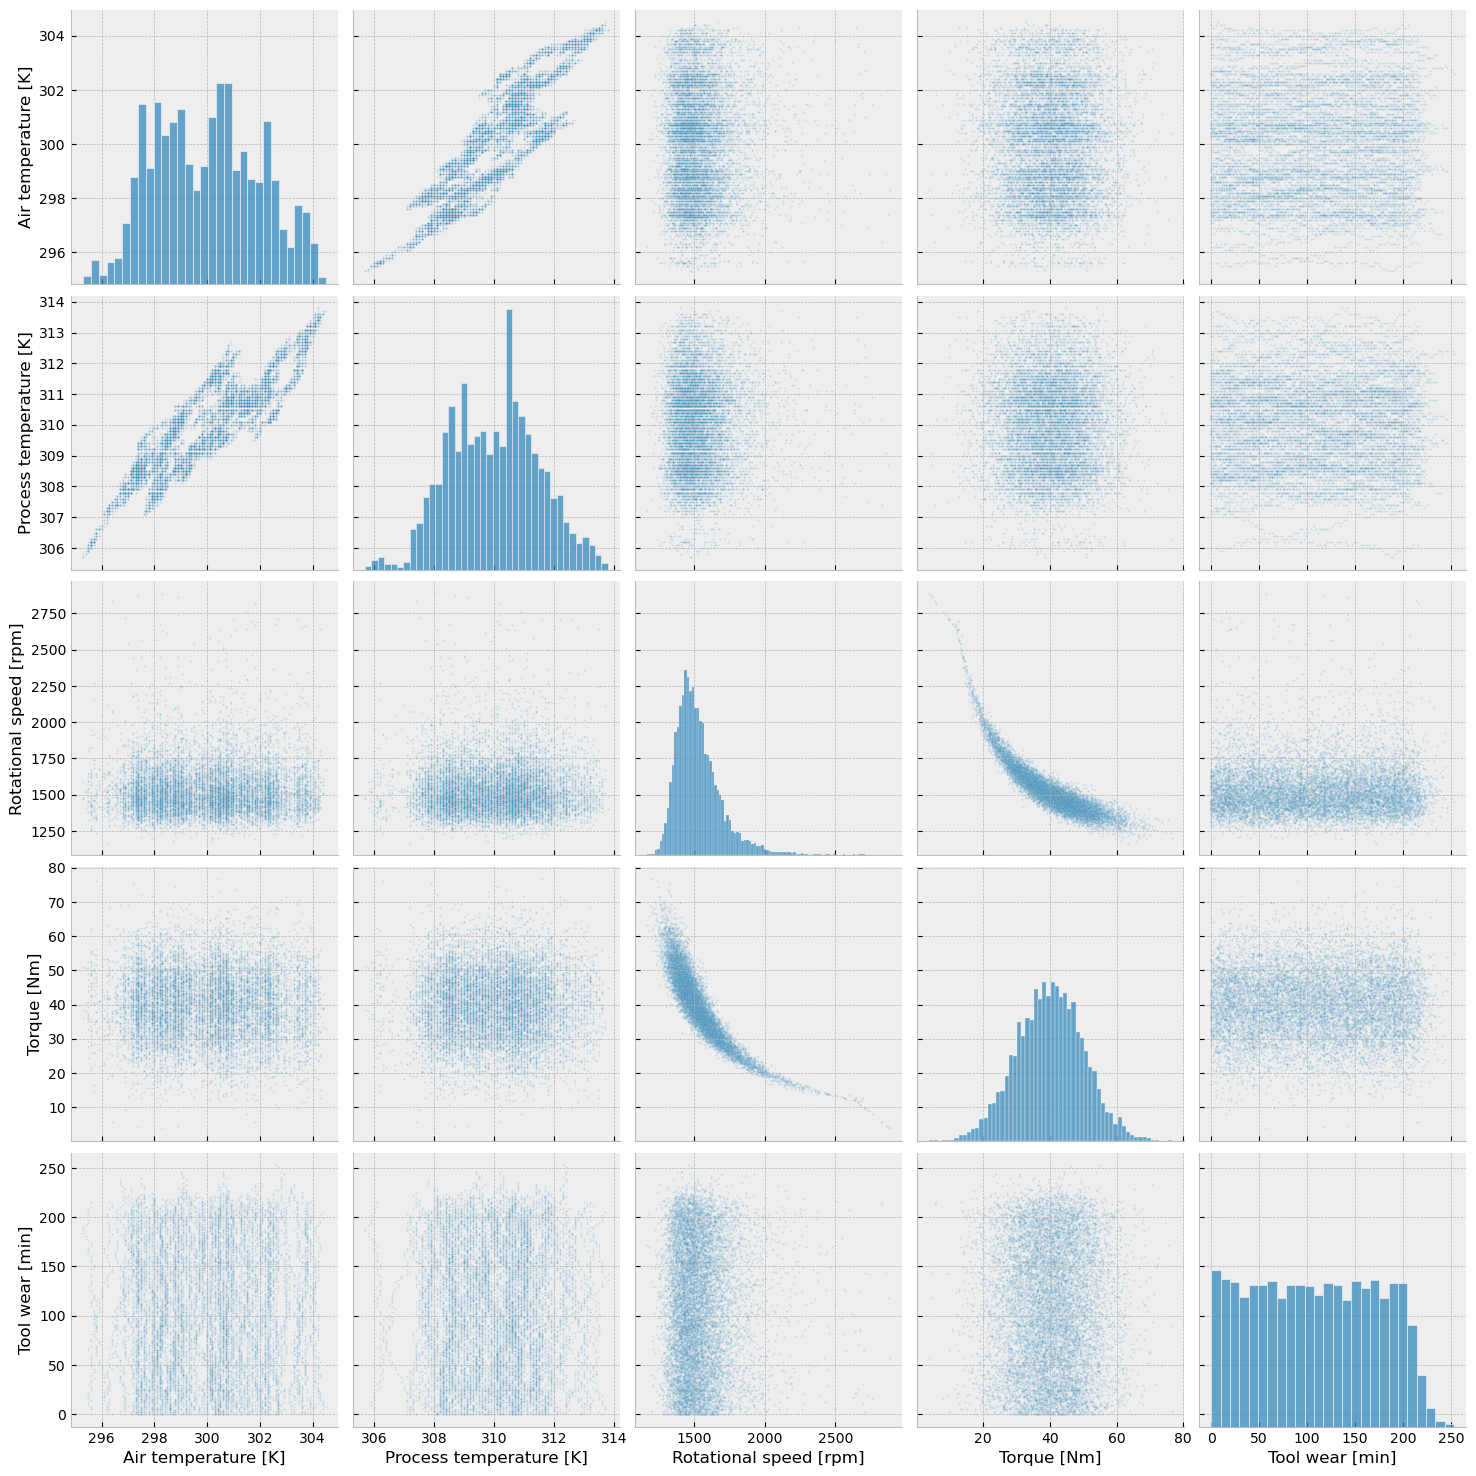

In [95]:
import seaborn as sns
sns.pairplot(df1, height=3, plot_kws={"s": 2, "alpha": 0.2});

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


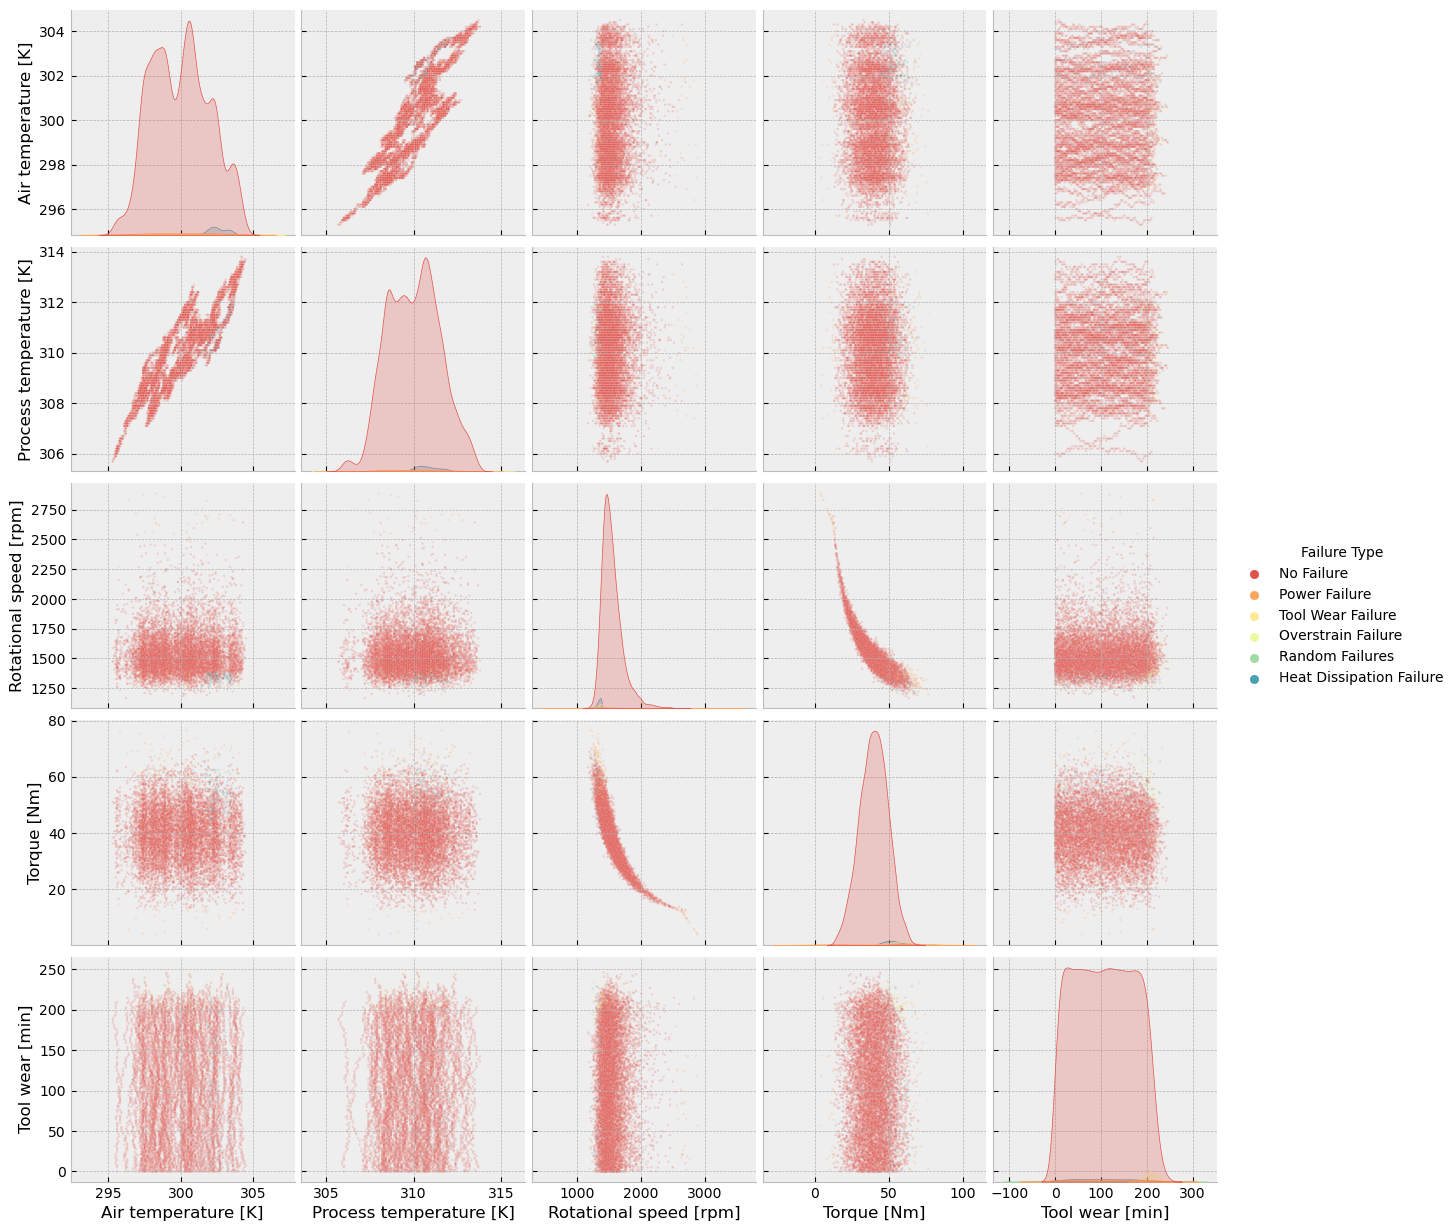

In [96]:
import seaborn as sns
sns.pairplot(
    df.drop(['UDI','Target'],axis=1), plot_kws={"s": 3, "alpha": 0.2}, hue="Failure Type", palette="Spectral" );

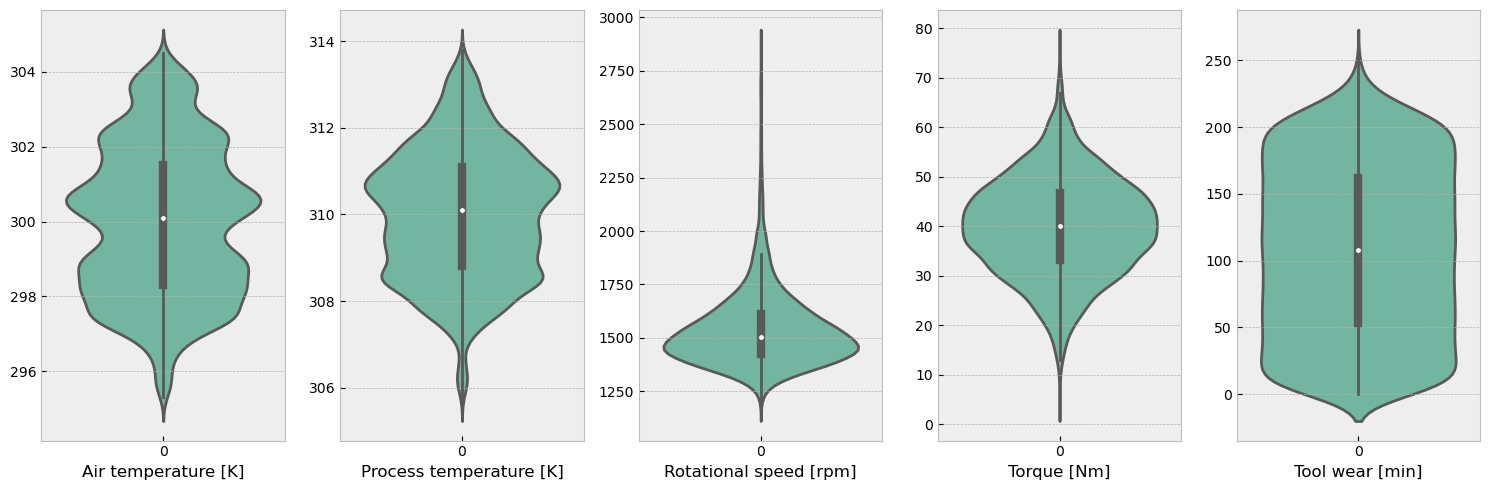

In [97]:
df11=df_X.drop(['Type'],axis=1)
fig, axes = plt.subplots(nrows=1, ncols=len(df11.columns), figsize=(15, 5))
for i, column in enumerate(df11.columns):
    sns.violinplot(data=df11[column], ax=axes[i], palette="Set2")
    axes[i].set_xlabel(column, fontsize=12)
fig.tight_layout()
plt.show()

## Data preprocessing

In [115]:

from sklearn.preprocessing import OrdinalEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])
df.head()

UDI  Product ID  Type  Air temperature [K]  Process temperature [K]  \
0    1      7003.0   2.0                298.1                    308.6   
1    2      1003.0   1.0                298.2                    308.7   
2    3      1004.0   1.0                298.1                    308.5   
3    4      1005.0   1.0                298.2                    308.6   
4    5      1006.0   1.0                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  Failure Type  
0                    1551         42.8                0       0           1.0  
1                    1408         46.3                3       0           1.0  
2                    1498         49.4                5       0           1.0  
3                    1433         39.5                7       0           1.0  
4                    1408         40.0                9       0           1.0

## RandomForestClassifier

In [99]:
from sklearn.model_selection import KFold
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
k = 3
accuracy_scores=[]
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    rf = RandomForestClassifier()
    param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
    rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
    X_train, y_train = train_data.drop(['Target','Failure Type','UDI','Product ID'], axis=1), train_data['Failure Type']
    X_test, y_test = test_data.drop(['Target','Failure Type','UDI','Product ID'], axis=1), test_data['Failure Type']
    rand_search.fit(X_train, y_train)
    y_pred = rand_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.9716988495490222


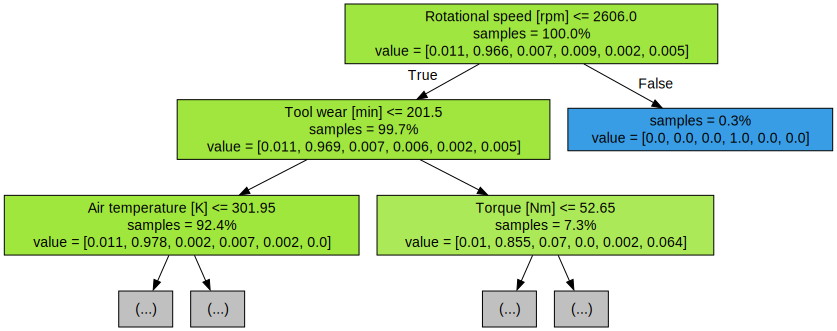

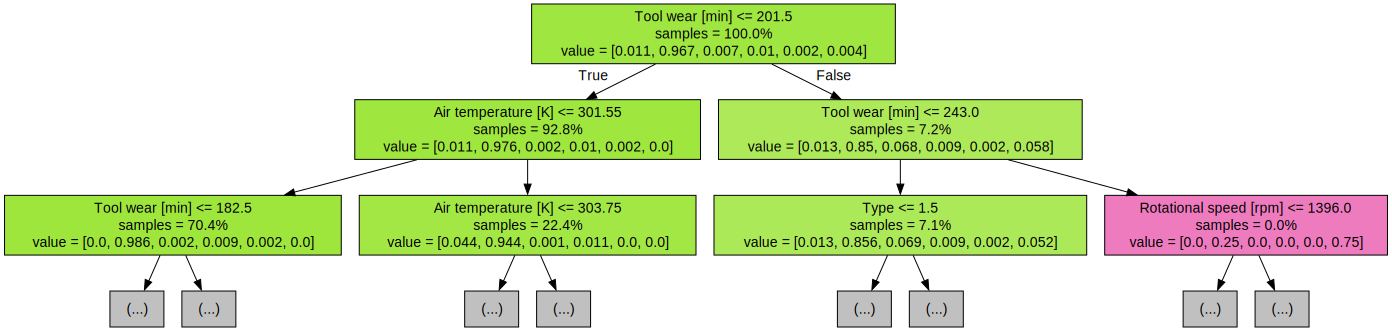

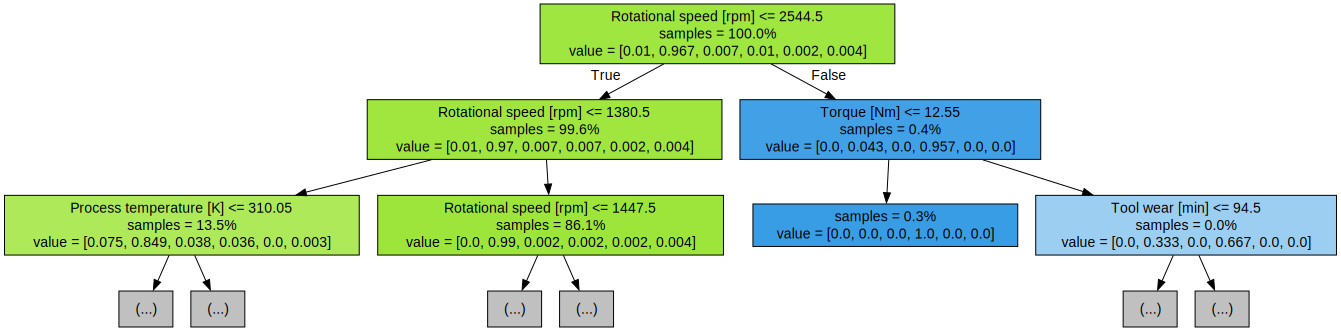

In [101]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree = rand_search.best_estimator_.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    dot_data = dot_data.replace('fillcolor="green', 'fillcolor="red')
    dot_data = dot_data.replace('fontcolor="#', 'fontcolor="white')
    graph = graphviz.Source(dot_data)
    display(graph)

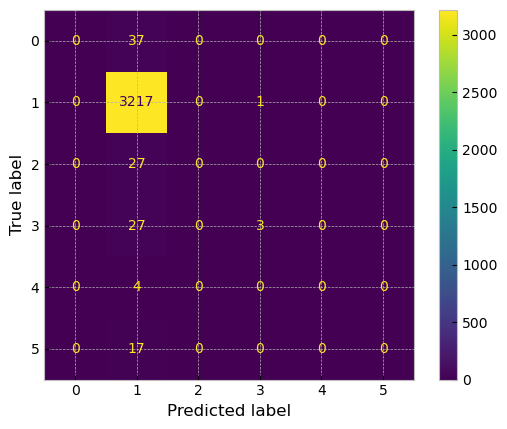

In [102]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Linear SVM

In [134]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

k = 7
accuracy_scores=[]
# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Iterate over each fold
for train_index, test_index in kf.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    X_train, y_train = train_data.drop(['Target','Failure Type','UDI','Product ID'], axis=1), train_data['Failure Type']
    X_test, y_test = test_data.drop(['Target','Failure Type','UDI','Product ID'], axis=1), test_data['Failure Type']
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
# The overall performance of the model
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.98069962764672


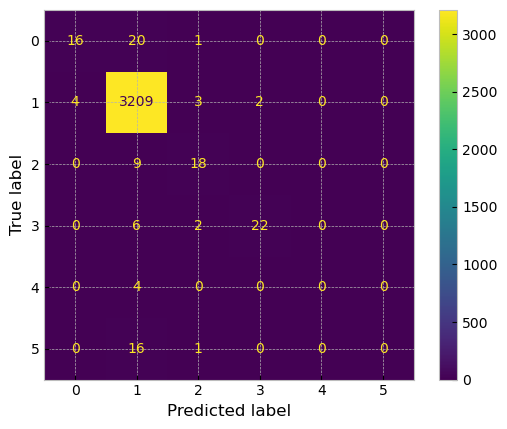

In [42]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## SVM with rbf kernel

In [128]:
X = df.drop(['Target','Failure Type','UDI','Product ID'], axis=1)
y = df['Failure Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd


svm = SVC(kernel='rbf')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9685


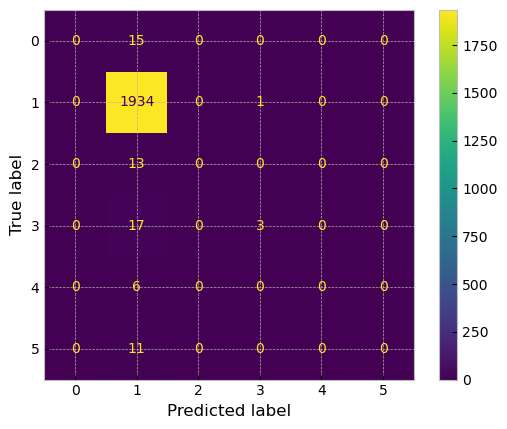

In [129]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## KNN

In [130]:
 from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3,5,7,8,9,10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

accuracy = best_knn.score(X_test, y_test)
print("Best parameters:", best_params)
print("Accuracy:", accuracy)


Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 0.97


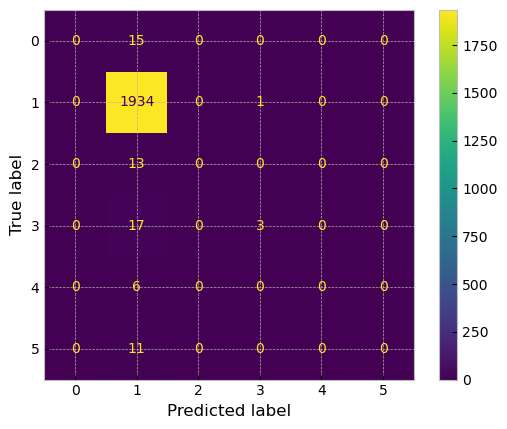

In [131]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Decision Tree

In [132]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9725


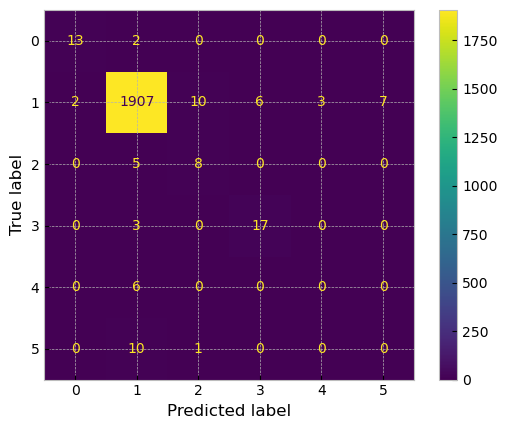

In [133]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [48]:
!pip install pydotplus

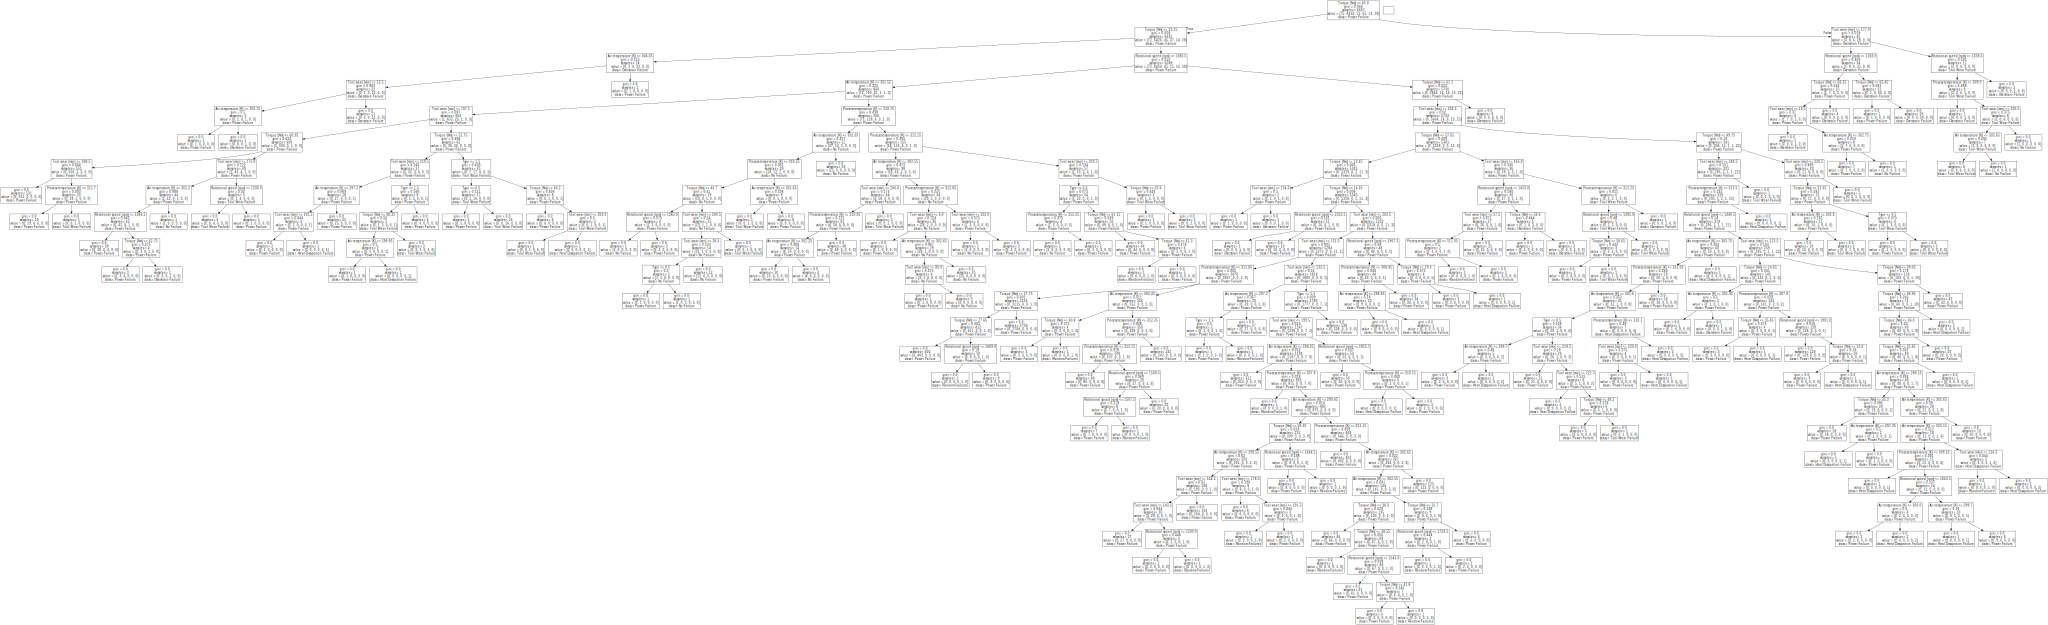

In [32]:
import pydotplus
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_train.columns,
                                class_names=['No Failure','Power Failure','Tool Wear Failure','Overstrain Failure','Random Failures','Heat Dissipation Failure'])
graph = pydotplus.graph_from_dot_data(dot_data)
graphviz.Source(graph.to_string())

## XGBClassifier

In [117]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re

X = df.drop(['Target','Failure Type','UDI','Product ID'], axis=1)
y = df['Failure Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]


model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.50%


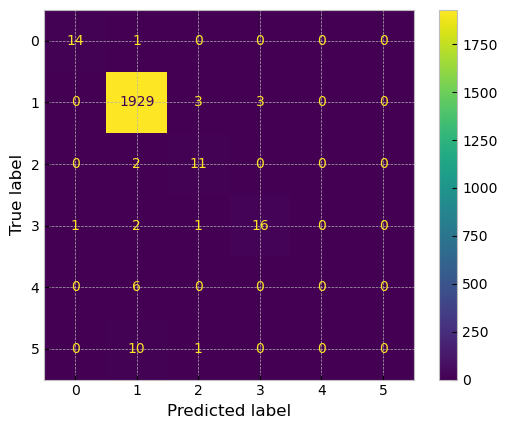

In [118]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Saving the model

In [37]:
import pickle

# Save your model using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [38]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
    print(model) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
